In [1]:
import pandas as pd 
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import statistics as st 
import seaborn as sns
from tabulate import tabulate

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv')
df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [3]:
df.shape

(1704, 6)

In [4]:
df.columns 

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

In [5]:
df.dtypes

country       object
year           int64
pop          float64
continent     object
lifeExp      float64
gdpPercap    float64
dtype: object

In [6]:
df.info()
# also gives how many object, int and float are there + 
# count, nonnull

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [7]:
country_df = df['country']
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [8]:
country_df.tail()

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object

In [9]:
subset = df[['country', 'continent', 'year']]
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [10]:
subset.iloc[0] == subset.loc[0] 

country      True
continent    True
year         True
Name: 0, dtype: bool

In [11]:
df.tail(n=5) == df.tail()

,country,year,pop,continent,lifeExp,gdpPercap
1699,True,True,True,True,True,True
1700,True,True,True,True,True,True
1701,True,True,True,True,True,True
1702,True,True,True,True,True,True
1703,True,True,True,True,True,True


In [12]:
df.loc[[0, 99, 999]]

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
99,Bangladesh,1967,62821884.0,Asia,43.453,721.186086
999,Mongolia,1967,1149500.0,Asia,51.253,1226.041130


In [13]:
df.iloc[[0, 99, 999]]

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
99,Bangladesh,1967,62821884.0,Asia,43.453,721.186086
999,Mongolia,1967,1149500.0,Asia,51.253,1226.041130


In [14]:
df.iloc[-1]
# df.loc[-1] --> error 

country        Zimbabwe
year               2007
pop          12311143.0
continent        Africa
lifeExp          43.487
gdpPercap    469.709298
Name: 1703, dtype: object

In [15]:
df.loc[:2]

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710


In [16]:
df.iloc[:2]

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030


In [17]:
subset = df.loc[:, ['year', 'pop']]
subset.head()

,year,pop
0,1952,8425333.0
1,1957,9240934.0
2,1962,10267083.0
3,1967,11537966.0
4,1972,13079460.0


In [18]:
subset = df.iloc[:, [0, 1, -1]]
subset.head()

,country,year,gdpPercap
0,Afghanistan,1952,779.445314
1,Afghanistan,1957,820.853030
2,Afghanistan,1962,853.100710
3,Afghanistan,1967,836.197138
4,Afghanistan,1972,739.981106


In [19]:
df.loc[42, 'country'] == df.iloc[42, 0]

True

In [20]:
df.iloc[[0, 99, 999], [0, 3, 5]] 

,country,continent,gdpPercap
0,Afghanistan,Asia,779.445314
99,Bangladesh,Asia,721.186086
999,Mongolia,Asia,1226.041130


In [21]:
df.loc[[0, 99, 999], ['country', 'continent', 'gdpPercap']] == df.iloc[[0, 99, 999], [0, 3, 5]] 

,country,continent,gdpPercap
0,True,True,True
99,True,True,True
999,True,True,True


In [22]:
df.iloc[0:10, [0, 3, 5]] 

,country,continent,gdpPercap
0,Afghanistan,Asia,779.445314
1,Afghanistan,Asia,820.853030
2,Afghanistan,Asia,853.100710
3,Afghanistan,Asia,836.197138
4,Afghanistan,Asia,739.981106
5,Afghanistan,Asia,786.113360
6,Afghanistan,Asia,978.011439
7,Afghanistan,Asia,852.395945
8,Afghanistan,Asia,649.341395
9,Afghanistan,Asia,635.341351


In [23]:
df.iloc[:10, :-1] 

,country,year,pop,continent,lifeExp
0,Afghanistan,1952,8425333.0,Asia,28.801
1,Afghanistan,1957,9240934.0,Asia,30.332
2,Afghanistan,1962,10267083.0,Asia,31.997
3,Afghanistan,1967,11537966.0,Asia,34.020
4,Afghanistan,1972,13079460.0,Asia,36.088
5,Afghanistan,1977,14880372.0,Asia,38.438
6,Afghanistan,1982,12881816.0,Asia,39.854
7,Afghanistan,1987,13867957.0,Asia,40.822
8,Afghanistan,1992,16317921.0,Asia,41.674
9,Afghanistan,1997,22227415.0,Asia,41.763


In [24]:
df.groupby(['year'])[['lifeExp', 'pop']].count()

,lifeExp,pop
year,,
1952,142,142
1957,142,142
1962,142,142
1967,142,142
1972,142,142
1977,142,142
1982,142,142
1987,142,142
1992,142,142


In [25]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [26]:
global_yearly_life_expectancy = df.groupby(['year'])['lifeExp'].mean()
global_yearly_life_expectancy

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

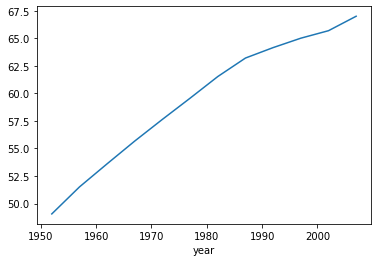

In [27]:
global_yearly_life_expectancy.plot();

In [ ]:
# ogive --> cumulative 